<a href="https://colab.research.google.com/github/Rifqi1006/Christmas-Sales-Insights/blob/main/Shipping_%26_Delivery_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Shipping & Delivery Performance**

### **Problem Steatment**

Selama periode Natal, lonjakan volume pesanan dan faktor eksternal seperti cuaca buruk atau acara khusus menjadi tantangan besar dalam manajemen pengiriman dan pengantaran. Tanpa analisis performa yang mendalam, sulit untuk mendeteksi inefisiensi, mengevaluasi kinerja penyedia jasa logistik, atau mengidentifikasi penyebab keterlambatan. Kondisi ini berisiko menurunkan kepuasan pelanggan sekaligus merugikan reputasi bisnis.

### **Objective**

1. Menganalisis Lead Time: Mengukur rata-rata waktu pengiriman dan mengidentifikasi trennya dari waktu ke waktu.
2. Menilai Efektivitas Metode Pengiriman: Membandingkan kinerja metode pengiriman yang berbeda.
3. Mengidentifikasi Faktor Eksternal: Menentukan dampak cuaca dan event khusus terhadap performa pengiriman.

### **Variabel Yang Tersedia**

Dari dataset yang dimiliki terdapat beberapa data yang tersedia:


---

**1. TransactionID:** adalah nomor unik yang diberikan untuk setiap transaksi.\
**2. Date:** Tanggal transaksi dalam format YYYY-MM-DD.\
**3. Time:** Waktu transaksi dalam format HH:MM:SS.\
**4. CustomerID:** ID unik untuk setiap pelanggan.\
**5. Age:** Usia pelanggan.\
**6. Gender:** Jenis kelamin pelanggan: Male, Female, atau Other.\
**7. Location:** Kota atau daerah tempat transaksi dilakukan.\
**8. StoreID:** ID unik toko fisik (jika pembelian dilakukan secara offline).\
**9. OnlineOrderFlag:** Menunjukkan apakah transaksi dilakukan secara online (True) atau offline (False).\
**10. ProductID:** ID unik dari produk yang dibeli.\
**11. ProductName:** Nama produk yang dibeli.\
**12. Category:** Kategori produk, misalnya: Electronics, Clothing, Toys, Food, Decorations.\
**13. Quantity:** Jumlah unit produk yang dibeli dalam transaksi tersebut.\
**14. UnitPrice:** Harga per unit dari produk yang dibeli.\
**15. TotalPrice:** Total harga produk dalam satu transaksi, dihitung sebagai Quantity × UnitPrice.\
**16. PaymentType:** Jenis metode pembayaran yang digunakan: Credit Card, Debit Card, Cash, atau Online Payment.\
**17. PromotionApplied:** Menunjukkan apakah ada promosi yang diterapkan dalam transaksi tersebut (True atau False).\
**18. DiscountAmount:** Jumlah nominal potongan harga yang diberikan (jika ada).\
**19. GiftWrap:** Menunjukkan apakah produk dibungkus sebagai hadiah (True atau False).\
**20. ShippingMethod:** Metode pengiriman yang digunakan untuk pembelian online, seperti Standard, Express, atau Overnight.\
**21. DeliveryTime:** Lama waktu pengiriman (dalam hari) untuk transaksi online.\
**22. Weather:** Kondisi cuaca saat transaksi berlangsung, seperti Sunny, Rainy, atau Snowy.\
**23. Event:** Acara khusus atau hari besar yang terjadi pada hari transaksi, misalnya Black Friday atau Christmas Market.\
**24. CustomerSatisfaction:** Tingkat kepuasan pelanggan terhadap transaksi, dinilai dari skala 1 hingga 5.\
**25. ReturnFlag:** Menunjukkan apakah produk dikembalikan (True) atau tidak (False).

### **Import Package**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats

### **Import Data**

In [2]:
df = pd.read_csv('Christmas_Sales.csv', header=0)

In [3]:
pd.set_option('display.max_column',None)

### **Data Understanding**

In [4]:
# DataFrame
df.head()

,TransactionID,Date,Time,CustomerID,Age,Gender,Location,StoreID,OnlineOrderFlag,ProductID,ProductName,Category,Quantity,UnitPrice,TotalPrice,PaymentType,PromotionApplied,DiscountAmount,GiftWrap,ShippingMethod,DeliveryTime,Weather,Event,CustomerSatisfaction,ReturnFlag
0,1,12/24/2020,7:27:59,441,27,Other,City_15,NaN,True,106,Toys_Product,Toys,5,96.786255,483.931273,Credit Card,False,0.0,False,Standard,5.0,Snowy,NaN,5,False
1,2,11/18/2022,14:36:39,340,43,Male,City_13,NaN,True,816,Clothing_Product,Clothing,1,95.279579,95.279579,Credit Card,True,0.0,True,Express,3.0,Sunny,NaN,2,True
2,3,12/26/2019,20:23:50,31,25,Other,City_7,92.0,False,508,Clothing_Product,Clothing,2,52.371645,104.743291,Credit Card,False,0.0,False,NaN,NaN,Rainy,Christmas Market,4,False
3,4,11/13/2018,23:08:08,39,64,Male,City_20,100.0,False,710,Toys_Product,Toys,5,63.647293,318.236463,Debit Card,False,0.0,True,NaN,NaN,Rainy,NaN,1,True
4,5,12/13/2020,4:38:08,344,26,Other,City_10,90.0,False,687,Toys_Product,Toys,3,57.384041,172.152122,Cash,False,0.0,True,NaN,NaN,Sunny,Christmas Market,4,False


In [5]:
# Info Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionID         10000 non-null  int64  
 1   Date                  10000 non-null  object 
 2   Time                  10000 non-null  object 
 3   CustomerID            10000 non-null  int64  
 4   Age                   10000 non-null  int64  
 5   Gender                10000 non-null  object 
 6   Location              10000 non-null  object 
 7   StoreID               4582 non-null   float64
 8   OnlineOrderFlag       10000 non-null  bool   
 9   ProductID             10000 non-null  int64  
 10  ProductName           10000 non-null  object 
 11  Category              10000 non-null  object 
 12  Quantity              10000 non-null  int64  
 13  UnitPrice             10000 non-null  float64
 14  TotalPrice            10000 non-null  float64
 15  PaymentType         

In [6]:
# Statistika Deskriptif
df.describe().round(2)

,TransactionID,CustomerID,Age,StoreID,ProductID,Quantity,UnitPrice,TotalPrice,DiscountAmount,DeliveryTime,CustomerSatisfaction
count,10000.00,10000.00,10000.00,4582.00,10000.00,10000.00,10000.00,10000.00,10000.00,5418.00,10000.00
mean,5000.50,251.93,43.79,50.92,500.23,3.01,54.96,165.43,6.95,3.00,2.98
std,2886.90,145.00,15.37,28.86,288.74,1.40,26.24,116.11,11.08,1.42,1.42
min,1.00,1.00,18.00,1.00,1.00,1.00,10.00,10.02,0.00,1.00,1.00
25%,2500.75,127.00,30.00,26.00,252.00,2.00,32.05,71.90,0.00,2.00,2.00
50%,5000.50,254.00,44.00,51.00,500.00,3.00,55.04,136.29,0.00,3.00,3.00
75%,7500.25,379.00,57.00,76.00,750.00,4.00,77.85,241.05,10.41,4.00,4.00
max,10000.00,500.00,70.00,100.00,1000.00,5.00,100.00,499.98,49.95,5.00,5.00


In [7]:
# Hubungan data dengan missing value
print(df[['CustomerID','OnlineOrderFlag','StoreID','ShippingMethod','DeliveryTime']])

      CustomerID  OnlineOrderFlag  StoreID ShippingMethod  DeliveryTime
0            441             True      NaN       Standard           5.0
1            340             True      NaN        Express           3.0
2             31            False     92.0            NaN           NaN
3             39            False    100.0            NaN           NaN
4            344            False     90.0            NaN           NaN
...          ...              ...      ...            ...           ...
9995         245             True      NaN        Express           4.0
9996         295             True      NaN        Express           5.0
9997         202            False     22.0            NaN           NaN
9998         310             True      NaN        Express           1.0
9999         469             True      NaN      Overnight           2.0

[10000 rows x 5 columns]


Missing value pada kolom StoreID, ShippingMethod, dan DeliveryTime merupakan konsekuensi logis dari jenis transaksi yang terjadi.
* Transaksi online (OnlineOrderFlag = TRUE) secara alami tidak memiliki StoreID karena tidak ada toko fisik yang terlibat.
* Sebaliknya, transaksi yang dilakukan langsung di toko (OnlineOrderFlag = FALSE) tidak memerlukan ShippingMethod dan DeliveryTime karena pelanggan langsung membawa pulang produk yang dibeli.

### **Data Preparation**

In [8]:
# Cek Data Duplicate
df.duplicated().sum()

np.int64(0)

In [9]:
# Cek Missing Value
print(df.isnull().sum())

TransactionID              0
Date                       0
Time                       0
CustomerID                 0
Age                        0
Gender                     0
Location                   0
StoreID                 5418
OnlineOrderFlag            0
ProductID                  0
ProductName                0
Category                   0
Quantity                   0
UnitPrice                  0
TotalPrice                 0
PaymentType                0
PromotionApplied           0
DiscountAmount             0
GiftWrap                   0
ShippingMethod          4582
DeliveryTime            4582
Weather                    0
Event                   2838
CustomerSatisfaction       0
ReturnFlag                 0
dtype: int64


In [10]:
# Salin dataframe untuk pembersihan data
df_clean = df.copy()

# Mengganti missing value dengan nilai tertentu
df_clean.fillna({
    'ShippingMethod': 'No Shipping',
    'DeliveryTime': 0,
    'StoreID': 'Online',
    'Event': 'No Event'
}, inplace=True)

# Mengubah tipe data
df_clean = df_clean.astype({
    'TransactionID': str,
    'CustomerID': str,
    'StoreID': str,
    'ProductID': str
})

# Mengubah kolom Date ke format datetime
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

# Menambahkan kolom Year dan Month
df_clean['Year'] = df_clean['Date'].dt.year
df_clean['Month'] = df_clean['Date'].dt.month

# Menghapus kolom redundant (ProductName)
df_clean.drop(columns=['ProductName'], inplace=True)

In [11]:
# Cek transaksi online yang tidak memiliki ShippingMethod
inconsistent_online = df_clean[(df_clean['OnlineOrderFlag'] == True) &
                              (df_clean['ShippingMethod'] == 'No Shipping')]

print(f"Jumlah transaksi online tanpa ShippingMethod: {len(inconsistent_online)}")

Jumlah transaksi online tanpa ShippingMethod: 0


In [12]:
# Cek Konsistensi TotalPrice dengan Quantity dan UnitPrice
CalculatedTotal = df_clean['Quantity'] * df_clean['UnitPrice']
inconsistent_prices = df_clean[abs(df_clean['TotalPrice'] - CalculatedTotal) != 0]

print(f"Jumlah transaksi dengan perhitungan harga tidak konsisten: {len(inconsistent_prices)}")

Jumlah transaksi dengan perhitungan harga tidak konsisten: 6091


In [13]:
# Mengganti seluruh nilai pada TotalPrice dengan CalculatedTotal
df_clean['TotalPrice'] = CalculatedTotal

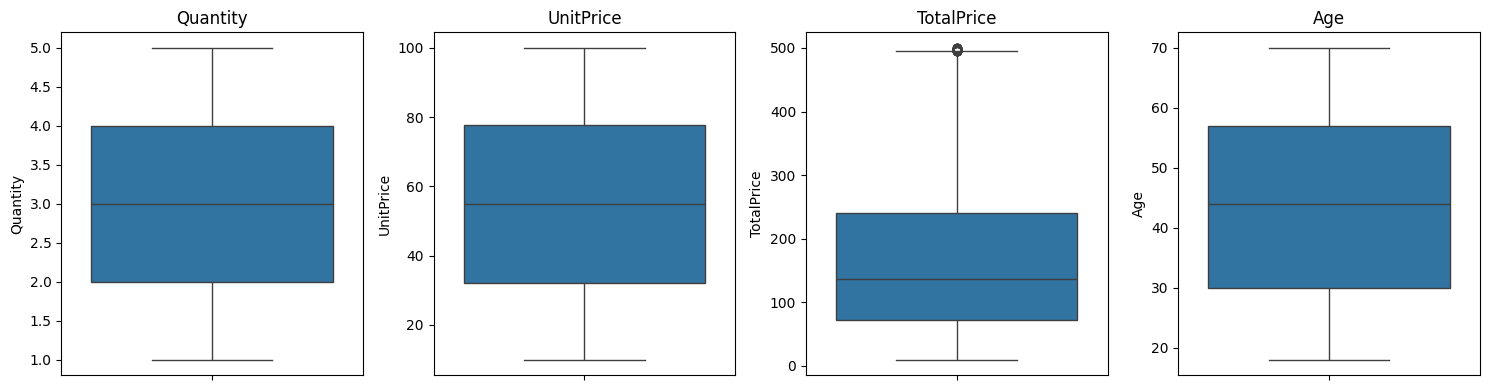

In [14]:
# Cek outlier untuk kolom numerik
numeric_cols = ['Quantity', 'UnitPrice', 'TotalPrice', 'Age']

plt.figure(figsize=(15,4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(y=df_clean[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [15]:
print(df_clean.isnull().sum())

TransactionID           0
Date                    0
Time                    0
CustomerID              0
Age                     0
Gender                  0
Location                0
StoreID                 0
OnlineOrderFlag         0
ProductID               0
Category                0
Quantity                0
UnitPrice               0
TotalPrice              0
PaymentType             0
PromotionApplied        0
DiscountAmount          0
GiftWrap                0
ShippingMethod          0
DeliveryTime            0
Weather                 0
Event                   0
CustomerSatisfaction    0
ReturnFlag              0
Year                    0
Month                   0
dtype: int64


In [16]:
df_clean.head()

,TransactionID,Date,Time,CustomerID,Age,Gender,Location,StoreID,OnlineOrderFlag,ProductID,Category,Quantity,UnitPrice,TotalPrice,PaymentType,PromotionApplied,DiscountAmount,GiftWrap,ShippingMethod,DeliveryTime,Weather,Event,CustomerSatisfaction,ReturnFlag,Year,Month
0,1,2020-12-24,7:27:59,441,27,Other,City_15,Online,True,106,Toys,5,96.786255,483.931273,Credit Card,False,0.0,False,Standard,5.0,Snowy,No Event,5,False,2020,12
1,2,2022-11-18,14:36:39,340,43,Male,City_13,Online,True,816,Clothing,1,95.279579,95.279579,Credit Card,True,0.0,True,Express,3.0,Sunny,No Event,2,True,2022,11
2,3,2019-12-26,20:23:50,31,25,Other,City_7,92.0,False,508,Clothing,2,52.371645,104.743291,Credit Card,False,0.0,False,No Shipping,0.0,Rainy,Christmas Market,4,False,2019,12
3,4,2018-11-13,23:08:08,39,64,Male,City_20,100.0,False,710,Toys,5,63.647293,318.236463,Debit Card,False,0.0,True,No Shipping,0.0,Rainy,No Event,1,True,2018,11
4,5,2020-12-13,4:38:08,344,26,Other,City_10,90.0,False,687,Toys,3,57.384041,172.152122,Cash,False,0.0,True,No Shipping,0.0,Sunny,Christmas Market,4,False,2020,12


In [17]:
df_clean.describe().round(2)

,Date,Age,Quantity,UnitPrice,TotalPrice,DiscountAmount,DeliveryTime,CustomerSatisfaction,Year,Month
count,10000,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,2021-05-31 23:03:41.760000256,43.79,3.01,54.96,165.43,6.95,1.63,2.98,2020.50,11.5
min,2018-11-01 00:00:00,18.00,1.00,10.00,10.02,0.00,0.00,1.00,2018.00,11.0
25%,2019-12-02 00:00:00,30.00,2.00,32.05,71.90,0.00,0.00,2.00,2019.00,11.0
50%,2021-11-01 00:00:00,44.00,3.00,55.04,136.29,0.00,1.00,3.00,2021.00,12.0
75%,2022-11-30 00:00:00,57.00,4.00,77.85,241.05,10.41,3.00,4.00,2022.00,12.0
max,2023-12-31 00:00:00,70.00,5.00,100.00,499.98,49.95,5.00,5.00,2023.00,12.0
std,NaN,15.37,1.40,26.24,116.11,11.08,1.83,1.42,1.71,0.5


### **Lead Time Analysis**

In [18]:
# Membuat dataframe pengiriman
df_delivery = df_clean[df_clean['OnlineOrderFlag'] == True].copy()[['TransactionID','Date','Event','ShippingMethod','Weather','DeliveryTime']]


#### **Analisis Kinerja Pengiriman Keseluruhan**

In [19]:
# On-time delivery rate (standar = 4 hari)
standard_delivery = 4
df_delivery['OnTime'] = df_delivery['DeliveryTime'] <= standard_delivery

df_delivery.head()

,TransactionID,Date,Event,ShippingMethod,Weather,DeliveryTime,OnTime
0,1,2020-12-24,No Event,Standard,Snowy,5.0,False
1,2,2022-11-18,No Event,Express,Sunny,3.0,True
6,7,2020-12-08,Christmas Market,Express,Sunny,2.0,True
7,8,2020-12-03,Black Friday,Standard,Rainy,3.0,True
11,12,2021-11-11,Christmas Market,Express,Sunny,3.0,True


Lead Time Statistics (dalam hari):
count    5418.000000
mean        3.004245
std         1.419484
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: DeliveryTime, dtype: float64

On-Time Delivery Rate (≤4 hari): 79.8%



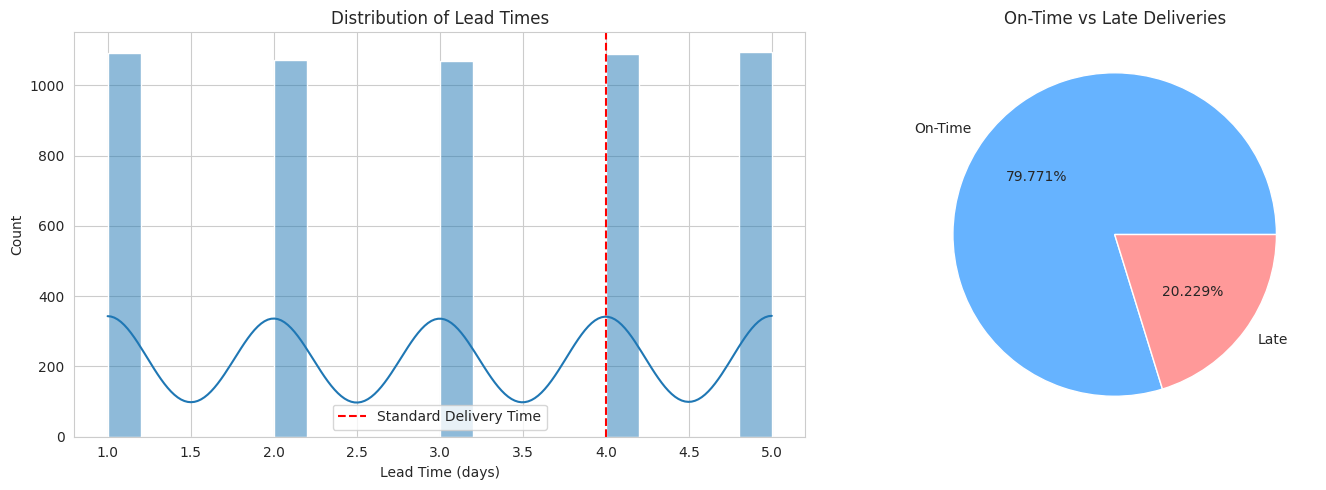

In [31]:
print("Lead Time Statistics (dalam hari):")
print(df_delivery['DeliveryTime'].describe())

on_time_rate = df_delivery['OnTime'].mean() * 100
print(f"\nOn-Time Delivery Rate (≤{standard_delivery} hari): {on_time_rate:.1f}%\n")

# Figure layout
plt.figure(figsize=(15, 5))

# Grafik 1: Distribution of Lead Times
plt.subplot(1, 2, 1)
sns.histplot(df_delivery['DeliveryTime'], bins=20, kde=True)
plt.axvline(standard_delivery, color='r', linestyle='--', label='Standard Delivery Time')
plt.title('Distribution of Lead Times')
plt.xlabel('Lead Time (days)')
plt.ylabel('Count')
plt.legend()

# Grafik 2: On-Time vs Late Deliveries
plt.subplot(1, 2, 2)
df_delivery['OnTime'].value_counts().plot(kind='pie', autopct='%1.3f%%',
                                 labels=['On-Time','Late'],
                                 colors=['#66b3ff','#ff9999'])

plt.title('On-Time vs Late Deliveries')
plt.ylabel('')

plt.tight_layout()
plt.show()

- Tingkat ketepatan waktu pengiriman (≤ 4 hari) mencapai 79,8%, sedangkan 20,2% sisanya terlambat.
- Distribusi lead time menunjukkan sebagian besar pengiriman berada di kisaran 1–4 hari, sesuai dengan standar waktu pengiriman (garis merah).
- Sebagian kecil pengiriman membutuhkan 5 hari, yang menjadi penyebab utama keterlambatan.

####	**Analisis Kinerja Berdasarkan Metode Pengiriman**

In [21]:
# Group by ShippingMethod
method_shipp = df_delivery.groupby('ShippingMethod').agg({
    'DeliveryTime':['mean','median','std','count'],
    'OnTime':'mean'
    }).reset_index()

method_shipp['OnTime'] = method_shipp['OnTime'] * 100
method_shipp.columns = ['ShippingMethod','Mean_LeadTime','Median_LeadTime',
                        'Std_LeadTime','Count','OnTime_Rate']

method_shipp_style = method_shipp.style.format({
    'Mean_LeadTime':'{:,.2f}',
    'Median_LeadTime':'{:,.2f}',
    'Std_LeadTime':'{:,.2f}',
    'Count':'{:,.0f}',
    'OnTime_Rate':'{:,.2f}%'
})

method_shipp_style

,ShippingMethod,Mean_LeadTime,Median_LeadTime,Std_LeadTime,Count,OnTime_Rate
0,Express,3.06,3.00,1.42,"1,819",78.50%
1,Overnight,2.97,3.00,1.42,"1,809",80.71%
2,Standard,2.98,3.00,1.41,"1,790",80.11%


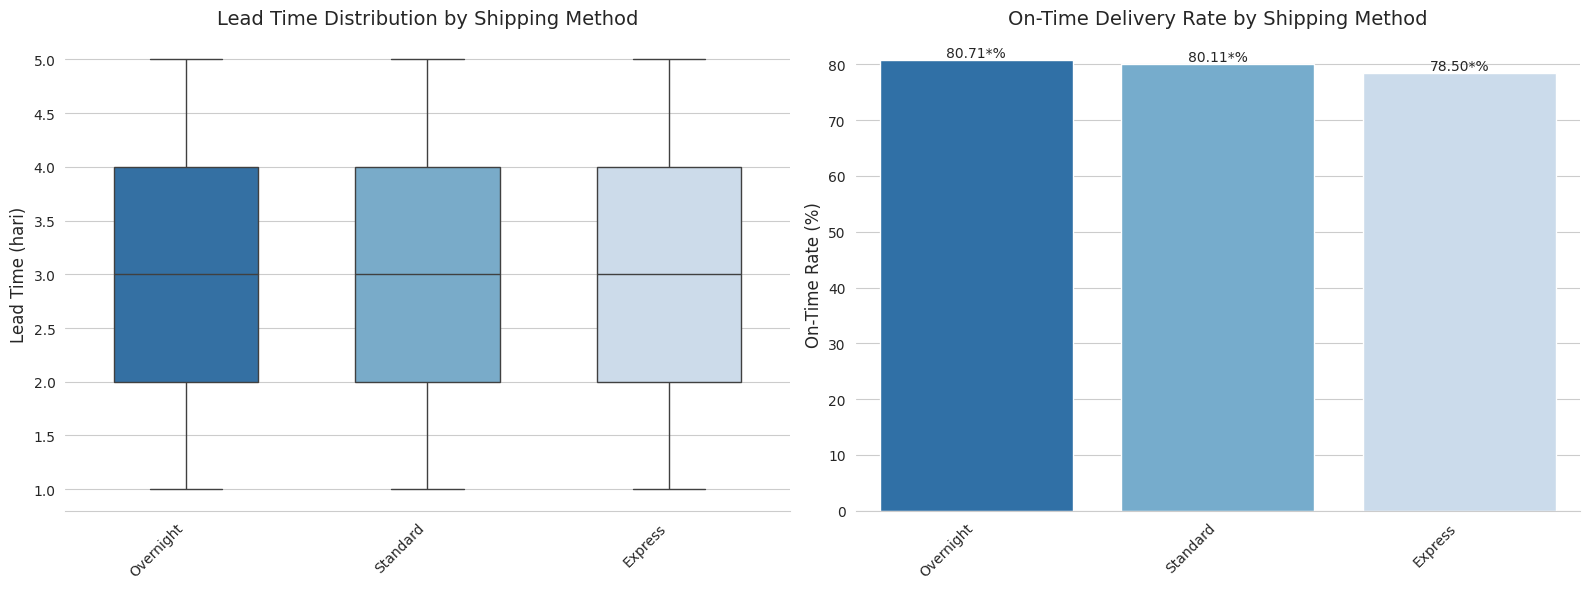

In [22]:
# Figure layout
plt.figure(figsize=(16, 6))

# Set style dan palette
sns.set_style("whitegrid")
n_methods = len(method_shipp)
palette = sns.color_palette("Blues_r", n_colors=n_methods)

# Urutkan ShippingMethod berdasarkan Mean_LeadTime untuk konsistensi
sorted_methods = method_shipp.sort_values('Mean_LeadTime')['ShippingMethod']

## Grafik 1: Lead Time Distribution by Shipping Method
plt.subplot(1, 2, 1)
sns.boxplot(x='ShippingMethod', y='DeliveryTime', data=df_delivery,
            order = method_shipp.sort_values('Mean_LeadTime')['ShippingMethod'],
            hue='ShippingMethod', palette=palette, legend=False,
            width=0.6, linewidth=1, fliersize=3,
            hue_order=sorted_methods)

plt.title('Lead Time Distribution by Shipping Method', fontsize=14, pad=10)
plt.ylabel('Lead Time (hari)', fontsize=12)
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
sns.despine(left=True)

## Grafik 2: On-Time Delivery Rate by Shipping Method
plt.subplot(1, 2, 2)
barplot = sns.barplot(x='ShippingMethod', y='OnTime_Rate',
            data = method_shipp.sort_values('Mean_LeadTime'),
            order = method_shipp.sort_values('Mean_LeadTime')['ShippingMethod'],
            hue='ShippingMethod', palette=palette, legend=False,
            saturation=0.8,
            hue_order=sorted_methods)

plt.title('On-Time Delivery Rate by Shipping Method', fontsize=14, pad=10)
plt.ylabel('On-Time Rate (%)', fontsize=12)
plt.xlabel('')
plt.xticks(rotation=45, ha='right')

# Menambahkan persentase di atas bar
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}*%',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 5),
                   textcoords='offset points',
                   fontsize=10)

sns.despine(left=True)
plt.tight_layout()
plt.show()

- Lead time rata-rata untuk semua metode pengiriman hampir sama (~ 3 hari, median 3 hari).
- Tingkat ketepatan waktu cukup seragam di semua metode: Overnight (81%), Standard (80%), dan Express (79%).
- Overnight memiliki performansi on-time tertinggi, meski selisihnya tipis dibanding metode lain.
- Variasi lead time (standar deviasi) hampir sama untuk semua metode, menunjukkan konsistensi waktu pengiriman antar metode.

#### **Analisis Dampak Cuaca Pada Pengiriman**

In [23]:
# Group by Weather
weather_shipp = df_delivery.groupby('Weather').agg({
    'DeliveryTime':['mean','median','std','count'],
    'OnTime':'mean'
    }).reset_index()

weather_shipp['OnTime'] = weather_shipp['OnTime'] * 100
weather_shipp.columns = ['Weather','Mean_LeadTime','Median_LeadTime',
                        'Std_LeadTime','Count','OnTime_Rate']

weather_shipp_style = weather_shipp.style.format({
    'Mean_LeadTime':'{:,.2f}',
    'Median_LeadTime':'{:,.2f}',
    'Std_LeadTime':'{:,.2f}',
    'Count':'{:,.0f}',
    'OnTime_Rate':'{:,.2f}%'
})

weather_shipp_style

,Weather,Mean_LeadTime,Median_LeadTime,Std_LeadTime,Count,OnTime_Rate
0,Rainy,3.01,3.00,1.41,"1,833",79.71%
1,Snowy,3.02,3.00,1.41,"1,806",80.12%
2,Sunny,2.99,3.00,1.44,"1,779",79.48%


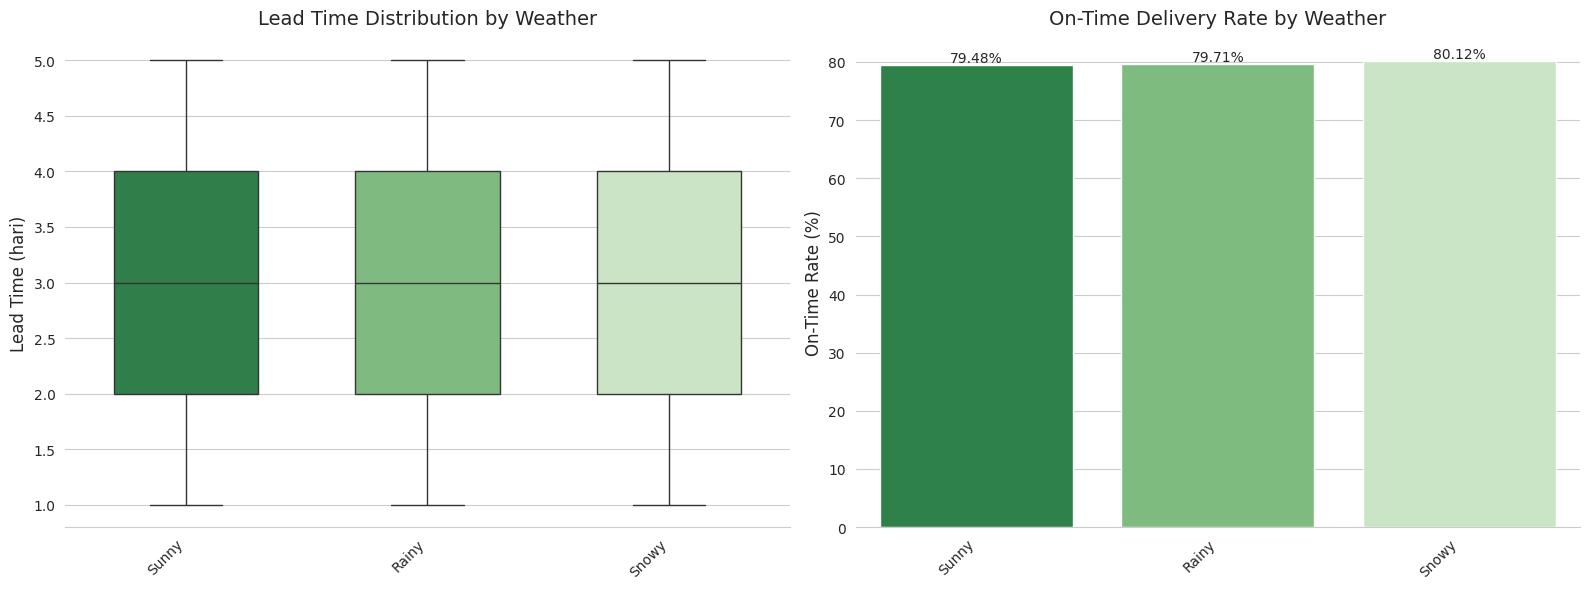

In [24]:
# Figure layout
plt.figure(figsize=(16, 6))

# Set style dan palette
sns.set_style("whitegrid")
n_methods = len(weather_shipp)
palette = sns.color_palette("Greens_r", n_colors=n_methods)

# Urutkan Weather berdasarkan Mean_LeadTime untuk konsistensi
sorted_methods = weather_shipp.sort_values('Mean_LeadTime')['Weather']

## Grafik 1: Lead Time Distribution by Weather
plt.subplot(1, 2, 1)
sns.boxplot(x='Weather', y='DeliveryTime', data=df_delivery,
            order = weather_shipp.sort_values('Mean_LeadTime')['Weather'],
            hue='Weather', palette=palette, legend=False,
            width=0.6, linewidth=1, fliersize=3,
            hue_order=sorted_methods)

plt.title('Lead Time Distribution by Weather', fontsize=14, pad=10)
plt.ylabel('Lead Time (hari)', fontsize=12)
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
sns.despine(left=True)

## Grafik 2: On-Time Delivery Rate by Weather
plt.subplot(1, 2, 2)
barplot = sns.barplot(x='Weather', y='OnTime_Rate',
            data = weather_shipp.sort_values('Mean_LeadTime'),
            order = weather_shipp.sort_values('Mean_LeadTime')['Weather'],
            hue='Weather', palette=palette, legend=False,
            saturation=0.8,
            hue_order=sorted_methods)

plt.title('On-Time Delivery Rate by Weather', fontsize=14, pad=10)
plt.ylabel('On-Time Rate (%)', fontsize=12)
plt.xlabel('')
plt.xticks(rotation=45, ha='right')

# Menambahkan persentase di atas bar
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}%',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 5),
                   textcoords='offset points',
                   fontsize=10)

sns.despine(left=True)
plt.tight_layout()
plt.show()

- Lead time rata-rata di semua kondisi cuaca hampir sama (~3 hari, median 3 hari).
- Tingkat ketepatan waktu relatif stabil di semua cuaca: Rainy & Snowy (80%), Sunny sedikit lebih rendah (79%).
- Variasi lead time (standar deviasi ~1.4 hari) juga konsisten, menunjukkan cuaca tidak berdampak signifikan terhadap waktu pengiriman.
- Volume transaksi per cuaca seimbang (sekitar 1.7–1.8 ribu transaksi per kategori).

#### **Analisis Dampak Event Pada Pengiriman**

In [25]:
# Group by Event
event_shipp = df_delivery.groupby('Event').agg({
    'DeliveryTime':['mean','median','std','count'],
    'OnTime':'mean'
    }).reset_index()

event_shipp['OnTime'] = event_shipp['OnTime'] * 100
event_shipp.columns = ['Event','Mean_LeadTime','Median_LeadTime',
                        'Std_LeadTime','Count','OnTime_Rate']

event_shipp_style = event_shipp.style.format({
    'Mean_LeadTime': '{:,.2f}',
    'Median_LeadTime': '{:,.2f}',
    'Std_LeadTime': '{:,.2f}',
    'Count': '{:,.0f}',
    'OnTime_Rate':'{:,.2f}%'
})

event_shipp_style

,Event,Mean_LeadTime,Median_LeadTime,Std_LeadTime,Count,OnTime_Rate
0,Black Friday,3.02,3.00,1.42,"2,341",79.41%
1,Christmas Market,3.00,3.00,1.44,"1,545",79.61%
2,No Event,2.98,3.00,1.41,"1,532",80.48%


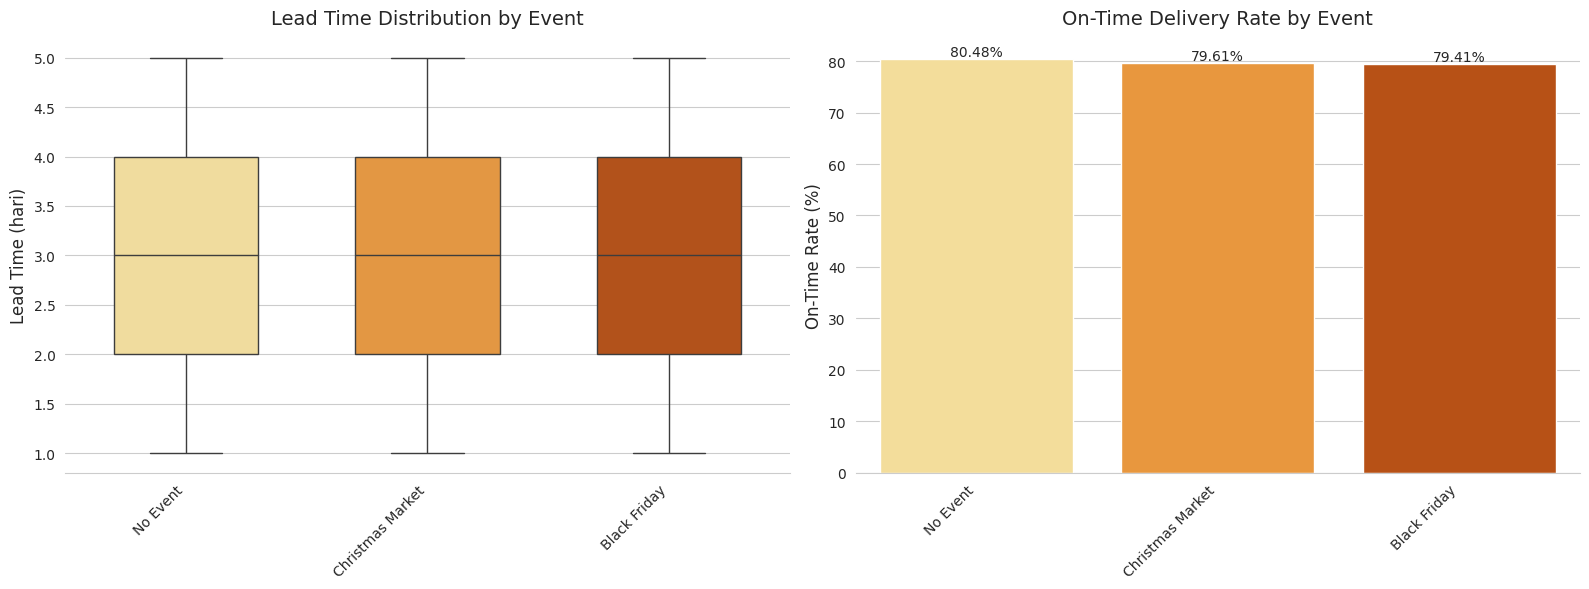

In [26]:
# Figure layout
plt.figure(figsize=(16, 6))

# Set style dan palette
sns.set_style("whitegrid")
n_methods = len(event_shipp)
palette = sns.color_palette("YlOrBr", n_colors=n_methods)

# Urutkan Event berdasarkan Mean_LeadTime untuk konsistensi
sorted_methods = event_shipp.sort_values('Mean_LeadTime')['Event']

## Grafik 1: Lead Time Distribution by Event
plt.subplot(1, 2, 1)
sns.boxplot(x='Event', y='DeliveryTime', data=df_delivery,
            order = event_shipp.sort_values('Mean_LeadTime')['Event'],
            hue='Event', palette=palette, legend=False,
            width=0.6, linewidth=1, fliersize=3,
            hue_order=sorted_methods)

plt.title('Lead Time Distribution by Event', fontsize=14, pad=10)
plt.ylabel('Lead Time (hari)', fontsize=12)
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
sns.despine(left=True)

## Grafik 2: On-Time Delivery Rate by Event
plt.subplot(1, 2, 2)
barplot = sns.barplot(x='Event', y='OnTime_Rate',
            data = event_shipp.sort_values('Mean_LeadTime'),
            order = event_shipp.sort_values('Mean_LeadTime')['Event'],
            hue='Event', palette=palette, legend=False,
            saturation=0.8,
            hue_order=sorted_methods)

plt.title('On-Time Delivery Rate by Event', fontsize=14, pad=10)
plt.ylabel('On-Time Rate (%)', fontsize=12)
plt.xlabel('')
plt.xticks(rotation=45, ha='right')

# Menambahkan persentase di atas bar
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}%',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 5),
                   textcoords='offset points',
                   fontsize=10)

sns.despine(left=True)
plt.tight_layout()
plt.show()

- Lead time rata-rata sama di semua event (~3 hari), artinya event besar tidak membuat proses lebih lambat.
- On-time delivery rate stabil (79%–80%), tidak terpengaruh signifikan oleh event besar.
- Black Friday punya volume order tertinggi, tapi performa pengiriman tetap terjaga.
- Variasi lead time mirip di semua event (standar deviasi ~1.4).

####	**Analisis Tren Lead Time dari Waktu ke Waktu**

In [27]:
# Menambahkan kolom OrderMonth
df_delivery['OrderMonth'] = df_delivery['Date'].dt.to_period('M').astype(str)
df_delivery.head()

,TransactionID,Date,Event,ShippingMethod,Weather,DeliveryTime,OnTime,OrderMonth
0,1,2020-12-24,No Event,Standard,Snowy,5.0,False,2020-12
1,2,2022-11-18,No Event,Express,Sunny,3.0,True,2022-11
6,7,2020-12-08,Christmas Market,Express,Sunny,2.0,True,2020-12
7,8,2020-12-03,Black Friday,Standard,Rainy,3.0,True,2020-12
11,12,2021-11-11,Christmas Market,Express,Sunny,3.0,True,2021-11


In [28]:
# Group by month
time_trends = df_delivery.groupby('OrderMonth').agg({
    'DeliveryTime':'mean',
    'OnTime':'mean',
    'TransactionID':'count'}).reset_index()

time_trends['OnTime_Rate'] = time_trends['OnTime'] * 100

time_trends_type = time_trends.style.format({
    'DeliveryTime':'{:,.2f}',
    'OnTime':'{:,.2f}',
    'TransactionID':'{:,.0f}',
    'OnTime_Rate':'{:.2f}%'
})

time_trends_type

,OrderMonth,DeliveryTime,OnTime,TransactionID,OnTime_Rate
0,2018-11,3.12,0.79,238,78.57%
1,2018-12,3.10,0.77,239,77.41%
2,2019-11,3.08,0.78,296,78.38%
3,2019-12,2.98,0.80,336,80.36%
4,2020-11,2.99,0.80,412,79.85%
5,2020-12,3.01,0.78,436,78.44%
6,2021-11,3.00,0.79,478,78.66%
7,2021-12,3.07,0.81,488,80.74%
8,2022-11,2.96,0.79,601,79.20%
9,2022-12,2.91,0.84,555,83.60%


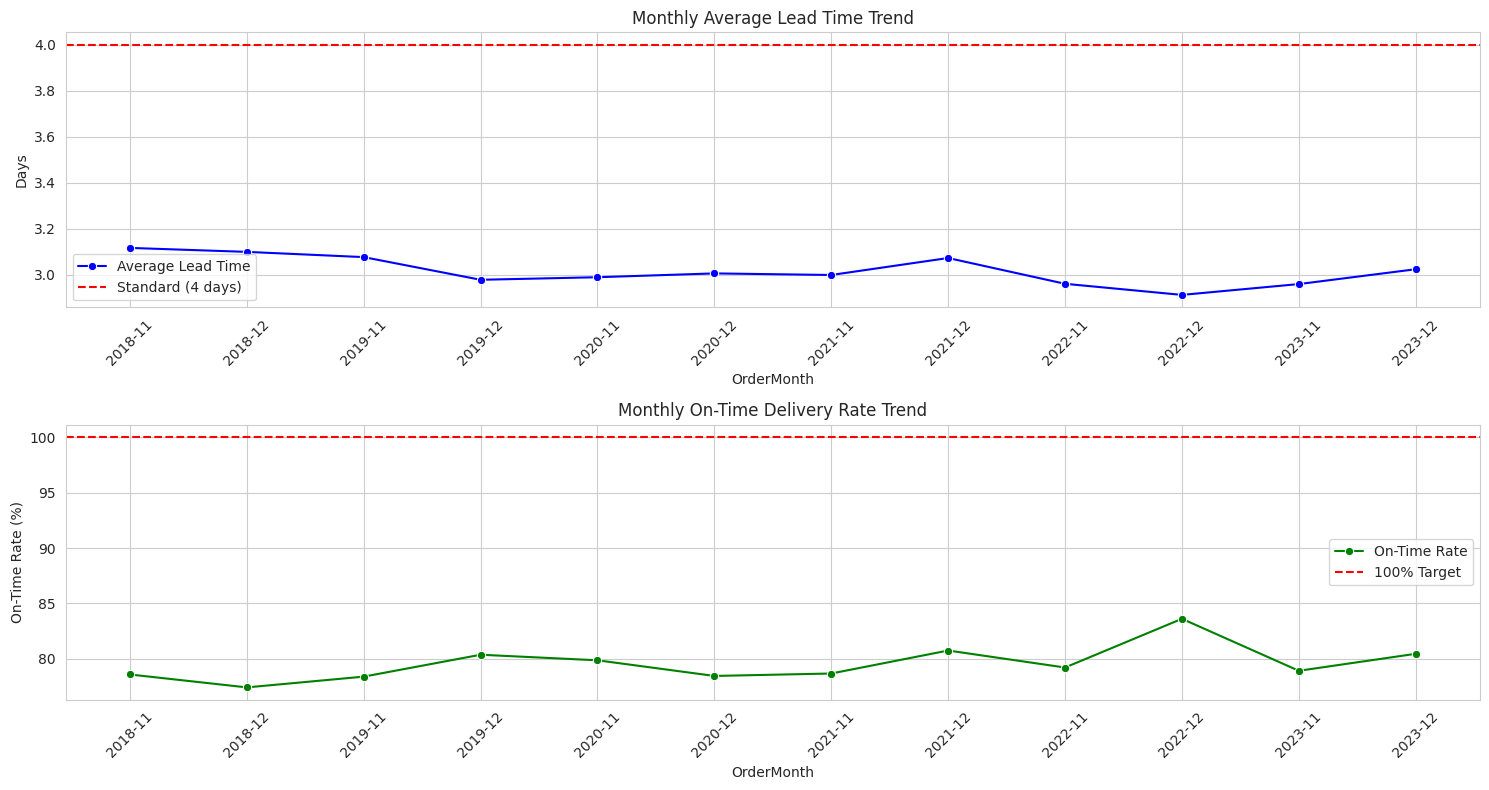

In [29]:
# Figure layout
plt.figure(figsize=(15, 8))

# Grafik 1: Monthly Average Lead Time Trend
plt.subplot(2, 1, 1)
sns.lineplot(x='OrderMonth', y='DeliveryTime', data=time_trends,
             marker='o', color='b', label='Average Lead Time')

plt.axhline(y=4, color='r', linestyle='--', label='Standard (4 days)')
plt.title('Monthly Average Lead Time Trend')
plt.xticks(rotation=45)
plt.ylabel('Days')
plt.legend()

# Grafik 2: Monthly On-Time Delivery Rate Trend
plt.subplot(2, 1, 2)
sns.lineplot(x='OrderMonth', y='OnTime_Rate', data=time_trends,
            marker='o', color='g', label='On-Time Rate')

plt.axhline(y=100, color='r', linestyle='--', label='100% Target')
plt.title('Monthly On-Time Delivery Rate Trend')
plt.xticks(rotation=45)
plt.ylabel('On-Time Rate (%)')
plt.legend()

plt.tight_layout()
plt.show()

- Rata-rata lead time selalu di bawah batas maksimal 4 hari, stabil di kisaran ±3 hari dari 2018–2023.
- On-time rate berada di kisaran 78% hingga 84% dari 2018 hingga 2023.
- Pada tahun 2022, One-time rate mencapai puncaknya, sekitar 84%, namun kemudian menurun di tahun 2023.

### **Kesimpulan**

Berdasarkan analisis yang dilakukan, rata-rata lead time pengiriman berada pada kisaran ±3 hari dan stabil dari waktu ke waktu. Sementara itu, on-time delivery rate menunjukkan tren fluktuatif di kisaran 78% hingga 84%, dengan puncaknya terjadi pada akhir tahun 2022. Perbandingan antar metode pengiriman menunjukkan perbedaan performa yang sangat tipis, dengan Overnight sedikit unggul namun tidak signifikan. Faktor eksternal seperti cuaca dan event khusus juga terbukti tidak memiliki dampak berarti terhadap lead time maupun tingkat ketepatan waktu pengiriman.

Solusi pengembangan ke depan:
- Melakukan root cause analysis pada pengiriman yang memakan waktu ≥ 5 hari.
- Mengeksplorasi faktor internal seperti kapasitas gudang dan penyiapan barang.
- Mengoptimalkan alokasi metode pengiriman berdasarkan jarak, lokasi, atau tipe produk.